In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import pandas_profiling as pd_prof

In [2]:
df=pd.read_csv('FitBit data.csv')

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [3]:
df.shape

(457, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [7]:
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

#### Handling categorical column : ActivityDate
##### Extracting day, month, year, week and dayOfweek information from the ActivityDate column. 

In [4]:
df['ActivityDate'] = pd.DatetimeIndex(df['ActivityDate']) # converting to datetime64[ns] 

In [5]:
df['Activity_year'] = df.ActivityDate.dt.year
df['Activity_month'] = df.ActivityDate.dt.month
df['Activity_day'] = df.ActivityDate.dt.day
df['Activity_week'] = df.ActivityDate.dt.week

<ipython-input-5-72795d85efaf>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Activity_week'] = df.ActivityDate.dt.week


In [6]:
df['Activity_day_of_week'] = df.ActivityDate.dt.day_name()

In [24]:
print('What is the duration of the date column of the dataset?')
print("Start_Date: ",df.ActivityDate.min())
print("End_Date: ",df.ActivityDate.max())
print("Duration: ",df.ActivityDate.max()-df.ActivityDate.min())

What is the duration of the date column of the dataset?
Start_Date:  2016-03-12 00:00:00
End_Date:  2016-04-12 00:00:00
Duration:  31 days 00:00:00


##### Handling categorical column - dayOfweek by encoding the values to numbers.

In [9]:
df['Activity_day_of_week'] = df['Activity_day_of_week'].map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [26]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,5
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,6
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,0
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,1
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2


# Analysis of the calories burned per step of the users.

In [34]:
df['CaloriesperStep'] = df.Calories / df.TotalSteps

In [84]:
df['CaloriesperStep'].head()

0    0.165304
1    0.122324
2    0.152638
3    0.146021
4    0.156632
Name: CaloriesperStep, dtype: float64

In [44]:
df[df.CaloriesperStep.isnull()][['TotalSteps','Calories','CaloriesperStep']]

,TotalSteps,Calories,CaloriesperStep
134,0,0,NaN
240,0,0,NaN
290,0,0,NaN
323,0,0,NaN
412,0,0,NaN


#### replacing null values in the CaloriesperStep column

In [47]:
df.CaloriesperStep.fillna(value=0,axis=0,inplace=True)

In [58]:
df.CaloriesperStep.dtype

dtype('float64')

#### Handling the 'inf' CaloriesperStep values

In [59]:
df[df.CaloriesperStep == float('inf')][['TotalSteps','Calories','CaloriesperStep']]

,TotalSteps,Calories,CaloriesperStep
51,0,1347,inf
52,0,1347,inf
59,0,399,inf
96,0,1324,inf
97,0,1324,inf
98,0,1324,inf
99,0,1324,inf
122,0,399,inf
135,0,1920,inf
136,0,1920,inf


Observation: There are so many data points where calories were still burned without any steps walked.

In [66]:
df[df.CaloriesperStep == float('inf')].shape

(56, 21)

In [67]:
df[df.CaloriesperStep == float('inf')].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
51,1844505072,2016-04-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,669,1347,2016,4,4,14,1,inf
52,1844505072,2016-04-05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,1347,2016,4,5,14,2,inf
59,1844505072,2016-04-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,426,399,2016,4,12,15,2,inf
96,2320127002,2016-04-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,1,13,5,inf
97,2320127002,2016-04-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,2,13,6,inf


In [69]:
df[df.CaloriesperStep == float('inf')].SedentaryMinutes.isnull().sum()

0

56 datapoints where there were records of burned calories without any number of steps walked.
All the data points have logs of sedentary Minutes
These datapoints are not useful for this analysis problem statement.
New data Frame without these records

In [80]:
df_calperstep = df[df.CaloriesperStep!=float('inf')]

In [85]:
df_calperstep.shape

(401, 21)

In [90]:
print(df_calperstep.CaloriesperStep.max())
print(df_calperstep.CaloriesperStep.min())
print(df_calperstep.CaloriesperStep.mean())
print(df_calperstep.CaloriesperStep.median())

444.5
0.0
4.156372269776654
0.3431151241534989


<AxesSubplot:ylabel='CaloriesperStep'>

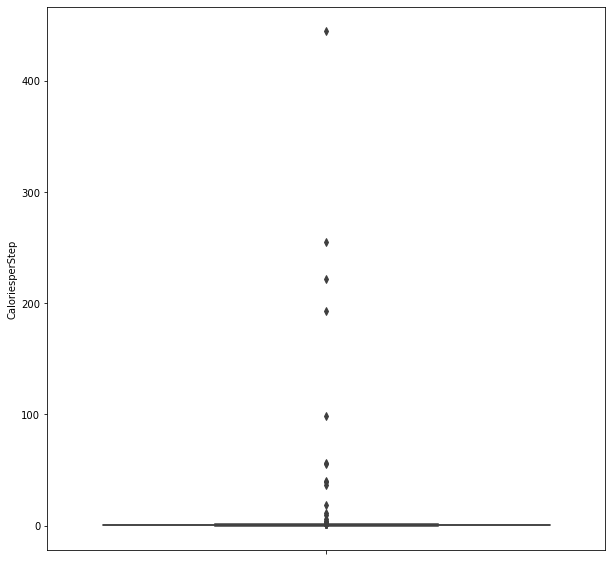

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(x=None, y='CaloriesperStep',data=df_calperstep)

The average calories per step that could be burnt by any person lies between 0 and 1.
As we can see from the boxplot of the CaloriesperStep column, some datapoints have values more than 100 up until 400. These outliers are invalid data points in terms of calories burned per step. 
Analysis of these data points:

In [95]:
df_calperstep[df_calperstep.CaloriesperStep>=1].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
20,1624580081,2016-03-26,815,0.53,0.53,0.0,0.0,0.0,0.53,0.0,...,0,47,1393,1264,2016,3,26,12,6,1.550920
31,1624580081,2016-04-06,1004,0.65,0.65,0.0,0.0,0.0,0.65,0.0,...,0,55,1385,1276,2016,4,6,14,3,1.270916
32,1624580081,2016-04-07,1111,0.72,0.72,0.0,0.0,0.0,0.72,0.0,...,0,54,1386,1278,2016,4,7,14,4,1.150315
53,1844505072,2016-04-06,7,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0,1,1439,1349,2016,4,6,14,3,192.714286
63,1927972279,2016-04-04,2352,1.63,1.63,0.0,0.0,0.0,1.63,0.0,...,0,128,829,2380,2016,4,4,14,1,1.011905


Most of these data points/users have only LightActiveMinutes in the day's duration and have walked less distance to have burnt so much calories. Hence these data points are invalid outliers.

Below are users who have walked the most distance and have had the highest VeryActiveDistance's in the entire dataset. As we can see, even their calories burned per step isn't as close to those of the invalid outliers observed above.

In [106]:
print('User who walked the most distance: ',df.TotalDistance.max(),'Kms')
df[df.TotalDistance == df.TotalDistance.max()][['TotalSteps','Calories','CaloriesperStep','VeryActiveDistance','VeryActiveMinutes']]

User who walked the most distance:  27.5300006866455 Kms


,TotalSteps,Calories,CaloriesperStep,VeryActiveDistance,VeryActiveMinutes
454,28497,4526,0.158824,21.92,128


In [107]:
print('User who has the highest VeryActiveDistance : ',df.VeryActiveDistance.max(),'Kms')
df[df.VeryActiveDistance == df.VeryActiveDistance.max()][['TotalSteps','TotalDistance','Calories','CaloriesperStep','VeryActiveMinutes']]

User who has the highest VeryActiveDistance :  21.9200000762939 Kms


,TotalSteps,TotalDistance,Calories,CaloriesperStep,VeryActiveMinutes
454,28497,27.530001,4526,0.158824,128


In [108]:
print('User who has the highest VeryActiveMinutes : ',df.VeryActiveMinutes.max(),'mins')
df[df.VeryActiveMinutes == df.VeryActiveMinutes.max()][['TotalSteps','TotalDistance','Calories','CaloriesperStep','VeryActiveDistance']]

User who has the highest VeryActiveMinutes :  202 mins


,TotalSteps,TotalDistance,Calories,CaloriesperStep,VeryActiveDistance
304,14873,11.11,4430,0.297855,8.19


In [111]:
df_calperstep[df_calperstep.CaloriesperStep>=1].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
20,1624580081,2016-03-26,815,0.53,0.53,0.0,0.0,0.0,0.53,0.0,...,0,47,1393,1264,2016,3,26,12,6,1.550920
31,1624580081,2016-04-06,1004,0.65,0.65,0.0,0.0,0.0,0.65,0.0,...,0,55,1385,1276,2016,4,6,14,3,1.270916
32,1624580081,2016-04-07,1111,0.72,0.72,0.0,0.0,0.0,0.72,0.0,...,0,54,1386,1278,2016,4,7,14,4,1.150315
53,1844505072,2016-04-06,7,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0,1,1439,1349,2016,4,6,14,3,192.714286
63,1927972279,2016-04-04,2352,1.63,1.63,0.0,0.0,0.0,1.63,0.0,...,0,128,829,2380,2016,4,4,14,1,1.011905


One possible reason for this could be that the user did not turn the smartwatch on during the day but the smartwatch ended up still calculating the calories burned but failed to record the steps walked and the minutes of Activity.

In [112]:
df_calperstep.CaloriesperStep.median()

0.3431151241534989

Deciding the threshold for dropping the outliers

In [133]:
df_calperstep[df_calperstep.CaloriesperStep>=2] # 2 calsperstep is the threshold, above that must be invalid.

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
53,1844505072,2016-04-06,7,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0,1,1439,1349,2016,4,6,14,3,192.714286
66,1927972279,2016-04-07,768,0.53,0.53,0.0,0.0,0.0,0.53,0.0,...,0,43,1397,2130,2016,4,7,14,4,2.773438
67,1927972279,2016-04-08,519,0.36,0.36,0.0,0.0,0.0,0.36,0.0,...,0,34,1406,2088,2016,4,8,14,5,4.023121
71,1927972279,2016-04-12,24,0.02,0.02,0.0,0.0,0.0,0.02,0.0,...,0,3,161,942,2016,4,12,15,2,39.250000
171,4020332650,2016-03-18,368,0.26,0.26,0.0,0.0,0.0,0.00,0.0,...,0,0,1440,2024,2016,3,18,11,5,5.500000
196,4020332650,2016-04-12,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,0,1,321,446,2016,4,12,15,2,55.750000
205,4057192912,2016-03-20,44,0.03,0.03,0.0,0.0,0.0,0.03,0.0,...,0,2,1438,1782,2016,3,20,11,0,40.500000
209,4057192912,2016-03-24,7,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,0,1,1439,1787,2016,3,24,12,4,255.285714
213,4057192912,2016-03-28,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,0,1,1439,1778,2016,3,28,13,1,222.250000
222,4057192912,2016-04-06,18,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,0,2,1438,1780,2016,4,6,14,3,98.888889


In [134]:
df_calperstep = df_calperstep[df_calperstep.CaloriesperStep<2]

In [137]:
df_calperstep.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,...,12,205,804,1819,2016,3,25,12,5,0.165304
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,...,17,274,588,2154,2016,3,26,12,6,0.122324
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,...,5,268,605,1944,2016,3,27,12,0,0.152638
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,...,20,224,1080,1932,2016,3,28,13,1,0.146021
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,...,28,243,763,1886,2016,3,29,13,2,0.156632


Action: Now this dataset can be used to analyze the calories burnt per step by the smartwatch users for various analysis problem statements.

# Analysis of Calories burnt to distance walked

In [147]:
df[(df['Calories']==0) & (df['TotalDistance']==0)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
134,2873212765,2016-04-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,0,2016,4,12,15,2,0.0
240,4319703577,2016-04-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,0,2016,4,9,14,6,0.0
290,4702921684,2016-04-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,0,2016,4,12,15,2,0.0
323,6117666160,2016-04-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,0,2016,4,10,14,0,0.0
412,8253242879,2016-04-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1440,0,2016,4,12,15,2,0.0


The above users have burnt 0 calories on specific days. The most of the on 2016-04-12.  

Action: These users can be reminded more often to stay more active with inspiring quotes and positive messages.

In [155]:
df[(df['Calories']!=0) & (df['TotalDistance']==0)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep
51,1844505072,2016-04-04,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,669,1347,2016,4,4,14,1,inf
52,1844505072,2016-04-05,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1347,2016,4,5,14,2,inf
53,1844505072,2016-04-06,7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,1,1439,1349,2016,4,6,14,3,192.714286
59,1844505072,2016-04-12,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,426,399,2016,4,12,15,2,inf
96,2320127002,2016-04-01,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,1,13,5,inf
97,2320127002,2016-04-02,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,2,13,6,inf
98,2320127002,2016-04-03,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,3,13,0,inf
99,2320127002,2016-04-04,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1324,2016,4,4,14,1,inf
122,2347167796,2016-04-12,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,425,399,2016,4,12,15,2,inf
135,2891001357,2016-03-29,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,1440,1920,2016,3,29,13,2,inf


The above are the data of users where on the day instance, eventhough the user hadn't walked and had stayed sedentary for the most part of the day, burnt calories were recorded. 
Again, these are data instances where probably the user didn't turn on his smartwatch througout the day but the smartwatch ended up calculating the burnt calories. 

Action: These Users could be reminded more often to turn their smartwatch smart settings on for their data to get recorded. 

In [159]:
df_CalperDist = df[df.TotalDistance!=0]

In [175]:
df_CalperDist.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,...,205,804,1819,2016,3,25,12,5,0.165304,255.836845
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,...,274,588,2154,2016,3,26,12,6,0.122324,186.493503
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,...,268,605,1944,2016,3,27,12,0,0.152638,227.901531
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,...,224,1080,1932,2016,3,28,13,1,0.146021,216.349377
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,...,243,763,1886,2016,3,29,13,2,0.156632,240.254780


In [174]:
df_CalperDist['CaloriesperDistance'] = df_CalperDist['Calories'] / df_CalperDist['TotalDistance']

<ipython-input-174-cf898e74e2d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CalperDist['CaloriesperDistance'] = df_CalperDist['Calories'] / df_CalperDist['TotalDistance']


<AxesSubplot:ylabel='CaloriesperDistance'>

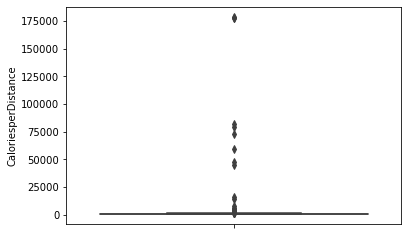

In [181]:
sns.boxplot(x=None, y='CaloriesperDistance', data=df_CalperDist)

In [204]:
df_CalperDist[df_CalperDist['CaloriesperDistance']>3000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
66,1927972279,2016-04-07,768,0.53,0.53,0.0,0.0,0.0,0.53,0.0,...,43,1397,2130,2016,4,7,14,4,2.773438,4018.868141
67,1927972279,2016-04-08,519,0.36,0.36,0.0,0.0,0.0,0.36,0.0,...,34,1406,2088,2016,4,8,14,5,4.023121,5799.999770
71,1927972279,2016-04-12,24,0.02,0.02,0.0,0.0,0.0,0.02,0.0,...,3,161,942,2016,4,12,15,2,39.250000,47100.001053
171,4020332650,2016-03-18,368,0.26,0.26,0.0,0.0,0.0,0.00,0.0,...,0,1440,2024,2016,3,18,11,5,5.500000,7784.615670
196,4020332650,2016-04-12,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,1,321,446,2016,4,12,15,2,55.750000,44600.000997
205,4057192912,2016-03-20,44,0.03,0.03,0.0,0.0,0.0,0.03,0.0,...,2,1438,1782,2016,3,20,11,0,40.500000,59400.001328
209,4057192912,2016-03-24,7,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,1,1439,1787,2016,3,24,12,4,255.285714,178700.003994
213,4057192912,2016-03-28,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,1,1439,1778,2016,3,28,13,1,222.250000,177800.003974
222,4057192912,2016-04-06,18,0.01,0.01,0.0,0.0,0.0,0.01,0.0,...,2,1438,1780,2016,4,6,14,3,98.888889,178000.003979
228,4057192912,2016-04-12,187,0.14,0.14,0.0,0.0,0.0,0.14,0.0,...,11,400,538,2016,4,12,15,2,2.877005,3842.857126


In [184]:
df_CalperDist['CaloriesperDistance'].median()

479.7069559568024

As we can see from the box plot of the CalorieperDistance as well the data points' corresponding records, we can observe that the users of these records have burnt a disproportionate number of calories in comparison to the steps walked as well as distance covered. 
As discussed in the previous module, for the ease of analytics, it is safe to assume that we can disregard the data that have a CalorieperStep value of more than 2.

In [205]:
df_CalperDist = df_CalperDist[df_CalperDist['CaloriesperStep']<2]

In [206]:
df_CalperDist.CaloriesperDistance.max()

2907.6924143458305

In [209]:
df_CalperDist[df_CalperDist['CaloriesperDistance']>2000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
20,1624580081,2016-03-26,815,0.53,0.53,0.0,0.00,0.00,0.53,0.0,...,47,1393,1264,2016,3,26,12,6,1.550920,2384.905789
65,1927972279,2016-04-06,1259,0.87,0.87,0.0,0.00,0.00,0.87,0.0,...,73,938,2202,2016,4,6,14,3,1.749007,2531.034469
70,1927972279,2016-04-11,1209,0.84,0.84,0.0,0.00,0.00,0.84,0.0,...,73,842,2255,2016,4,11,15,1,1.865178,2684.523893
123,2873212765,2016-04-01,890,0.60,0.60,0.0,0.00,0.00,0.60,0.0,...,41,1399,1335,2016,4,1,13,5,1.500000,2224.999912
181,4020332650,2016-03-28,2106,1.51,1.51,0.0,0.02,0.05,0.21,0.0,...,75,1289,4010,2016,3,28,13,1,1.904084,2655.629156
203,4057192912,2016-03-18,949,0.69,0.69,0.0,0.00,0.00,0.69,0.0,...,34,1406,1870,2016,3,18,11,5,1.970495,2710.144937
389,7086361926,2016-04-12,430,0.26,0.26,0.0,0.00,0.00,0.26,0.0,...,14,75,625,2016,4,12,15,2,1.453488,2403.846242
439,8792009665,2016-04-07,1291,0.83,0.83,0.0,0.00,0.00,0.83,0.0,...,77,888,1961,2016,4,7,14,4,1.518978,2362.650650
440,8792009665,2016-04-08,1467,0.94,0.94,0.0,0.10,0.21,0.63,0.0,...,71,912,1953,2016,4,8,14,5,1.331288,2077.659580
441,8792009665,2016-04-09,1022,0.65,0.65,0.0,0.00,0.00,0.65,0.0,...,63,739,1890,2016,4,9,14,6,1.849315,2907.692414


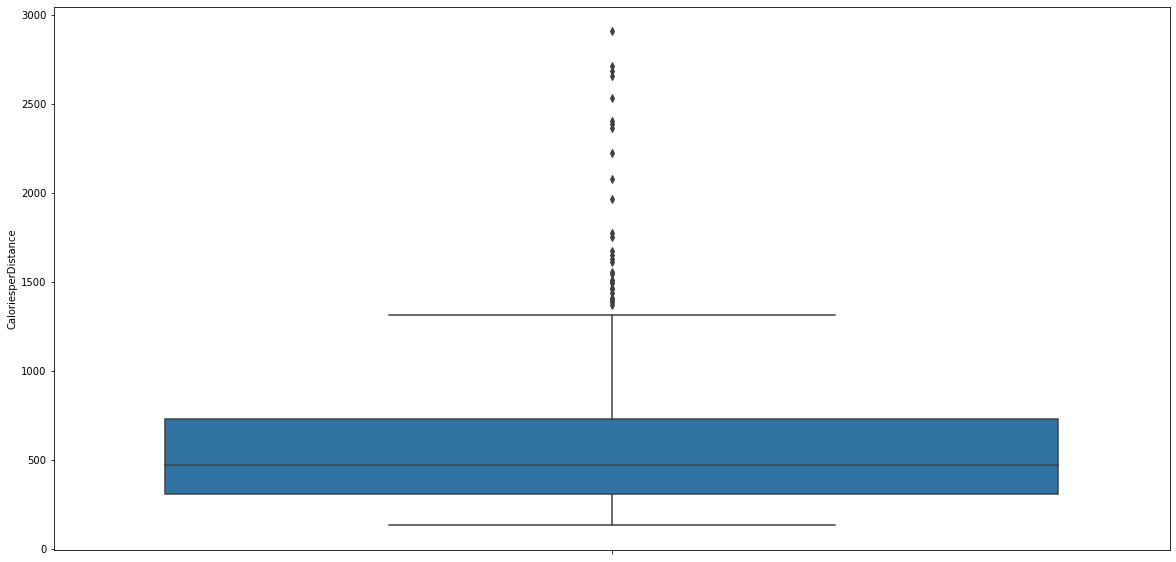

In [211]:
 plt.figure(figsize=(20,10))
sns.boxplot(x=None, y='CaloriesperDistance', data=df_CalperDist)
plt.show()

Analyzing the outliers from the above boxm plot of the CaloriesperDistance of users

In [220]:
df_CalperDist[df_CalperDist['CaloriesperDistance']>2250]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
20,1624580081,2016-03-26,815,0.53,0.53,0.0,0.00,0.00,0.53,0.0,...,47,1393,1264,2016,3,26,12,6,1.550920,2384.905789
65,1927972279,2016-04-06,1259,0.87,0.87,0.0,0.00,0.00,0.87,0.0,...,73,938,2202,2016,4,6,14,3,1.749007,2531.034469
70,1927972279,2016-04-11,1209,0.84,0.84,0.0,0.00,0.00,0.84,0.0,...,73,842,2255,2016,4,11,15,1,1.865178,2684.523893
181,4020332650,2016-03-28,2106,1.51,1.51,0.0,0.02,0.05,0.21,0.0,...,75,1289,4010,2016,3,28,13,1,1.904084,2655.629156
203,4057192912,2016-03-18,949,0.69,0.69,0.0,0.00,0.00,0.69,0.0,...,34,1406,1870,2016,3,18,11,5,1.970495,2710.144937
389,7086361926,2016-04-12,430,0.26,0.26,0.0,0.00,0.00,0.26,0.0,...,14,75,625,2016,4,12,15,2,1.453488,2403.846242
439,8792009665,2016-04-07,1291,0.83,0.83,0.0,0.00,0.00,0.83,0.0,...,77,888,1961,2016,4,7,14,4,1.518978,2362.650650
441,8792009665,2016-04-09,1022,0.65,0.65,0.0,0.00,0.00,0.65,0.0,...,63,739,1890,2016,4,9,14,6,1.849315,2907.692414


All the outliers have sigificantly disproportionate amount of calories burnt in comparison to their steps walked and Totaldistance walked.
So these datapoints can also be disregarded for a better dataset suitable to the problem statement.

In [221]:
df_CalperDist = df_CalperDist[df_CalperDist['CaloriesperDistance']<2250]

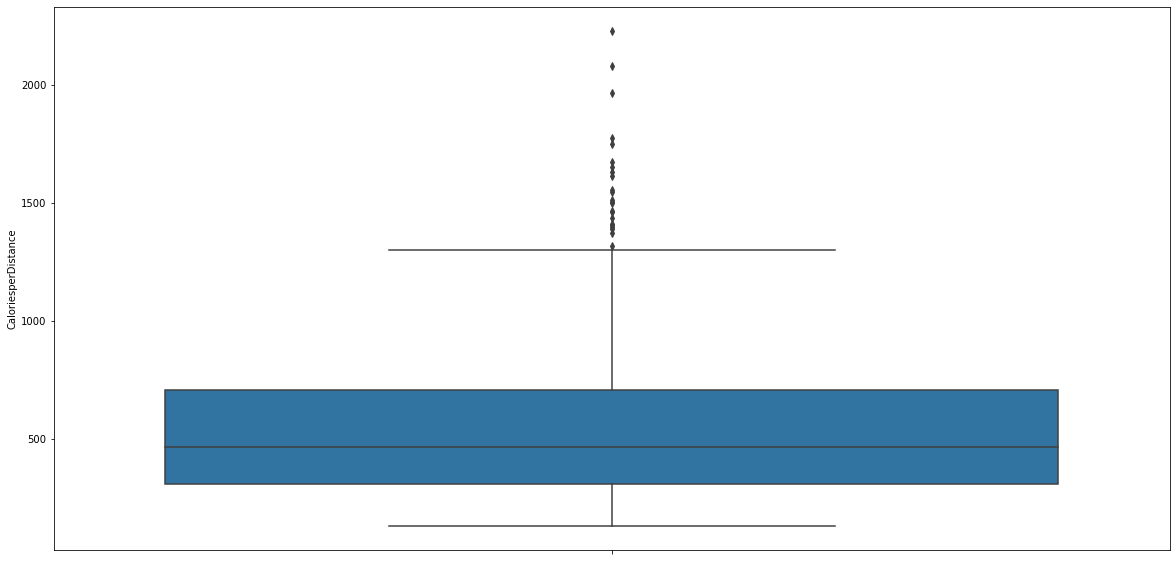

In [224]:
 plt.figure(figsize=(20,10))
sns.boxplot(x=None, y='CaloriesperDistance', data=df_CalperDist)
plt.show()

The above dataset seems to be having the likely datapoints of interest based on the Calories burnt per distance walked and Calories burnt per step. This dataset can beused for a variety of problem statements or use cases as it is a clean dataset. 

In [225]:
df_CalperDist.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,...,205,804,1819,2016,3,25,12,5,0.165304,255.836845
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,...,274,588,2154,2016,3,26,12,6,0.122324,186.493503
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,...,268,605,1944,2016,3,27,12,0,0.152638,227.901531
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,...,224,1080,1932,2016,3,28,13,1,0.146021,216.349377
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,...,243,763,1886,2016,3,29,13,2,0.156632,240.254780


Exploratory Problem Statements

In [226]:
Df = df_CalperDist

In [227]:
Df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Activity_year',
       'Activity_month', 'Activity_day', 'Activity_week',
       'Activity_day_of_week', 'CaloriesperStep', 'CaloriesperDistance'],
      dtype='object')

In [228]:
print(Df.Id.shape[0])
print(Df.Id.nunique())

368
34


Observation :  The dataset has data from 34 different users.

In [229]:
numberOfrecordsperUser_avg = Df.Id.shape[0]/Df.Id.nunique()
print("Average records per user: ",numberOfrecordsperUser_avg)

Average records per user:  10.823529411764707


In [230]:
print("Number of day based records of all individual users:")
Df.groupby('Id').ActivityDate.count()

Number of day based records of all individual users:


Id
1503960366    19
1624580081    18
1644430081    10
1844505072     8
1927972279     7
2022484408    12
2026352035    12
2320127002     8
2347167796    14
2873212765    11
2891001357     2
3372868164    10
3977333714    12
4020332650    29
4057192912    12
4319703577    11
4445114986    14
4558609924    12
4702921684    14
5553957443    12
5577150313    11
6117666160     8
6290855005     2
6391747486     2
6775888955     7
6962181067    14
7007744171    12
7086361926     9
8053475328    10
8253242879     6
8378563200    12
8583815059     8
8792009665     8
8877689391    12
Name: ActivityDate, dtype: int64

As we can see from the above results, the user : 4020332650 has the most number of records, 29. That is almost equal to duration of the ActivityDate of the dataset. That means that the user had his/her smartwatche turned on almost everyday and used it actively.
Targeted EDA can be done to
this User.

In [231]:
df_4020332650 = Df[Df['Id']==4020332650]

In [232]:
df_4020332650

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_year,Activity_month,Activity_day,Activity_week,Activity_day_of_week,CaloriesperStep,CaloriesperDistance
165,4020332650,2016-03-12,5543,3.97,3.97,0.0,0.00,0.00,3.96,0.01,...,254,757,2990,2016,3,12,10,6,0.539419,753.148609
166,4020332650,2016-03-13,3226,2.31,2.31,0.0,0.00,0.00,2.28,0.00,...,136,771,2480,2016,3,13,10,0,0.768754,1073.593100
167,4020332650,2016-03-14,3023,2.17,2.17,0.0,0.00,0.00,2.14,0.00,...,145,1005,2570,2016,3,14,11,1,0.850149,1184.331756
168,4020332650,2016-03-15,5906,4.23,4.23,0.0,0.00,0.16,4.04,0.00,...,215,874,3016,2016,3,15,11,2,0.510667,713.002361
169,4020332650,2016-03-16,12483,8.99,8.99,0.0,1.45,0.57,6.90,0.00,...,309,599,3830,2016,3,16,11,3,0.306817,426.028932
170,4020332650,2016-03-17,8940,6.41,6.41,0.0,0.00,0.00,0.61,0.04,...,47,986,3706,2016,3,17,11,4,0.414541,578.159140
172,4020332650,2016-03-19,5702,4.09,4.09,0.0,0.00,0.00,0.00,0.00,...,0,1440,2980,2016,3,19,11,6,0.522624,728.606330
173,4020332650,2016-03-20,10330,7.41,7.41,0.0,0.00,0.00,0.00,0.00,...,0,1440,3728,2016,3,20,11,0,0.360891,503.103924
174,4020332650,2016-03-21,8778,6.29,6.29,0.0,0.00,0.00,0.00,0.00,...,0,1440,3348,2016,3,21,12,1,0.381408,532.273453
175,4020332650,2016-03-22,6662,4.78,4.78,0.0,0.00,0.00,0.00,0.00,...,0,1440,3162,2016,3,22,12,2,0.474632,661.506247
